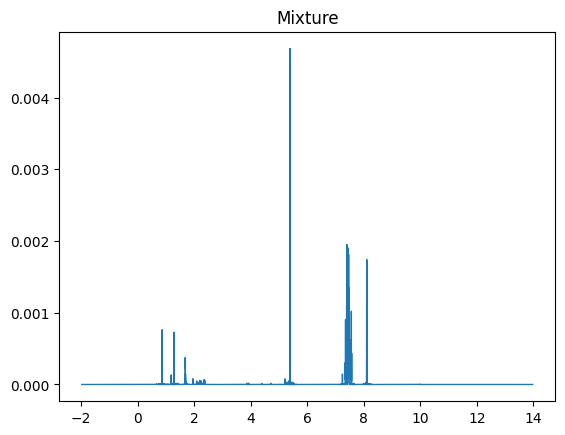

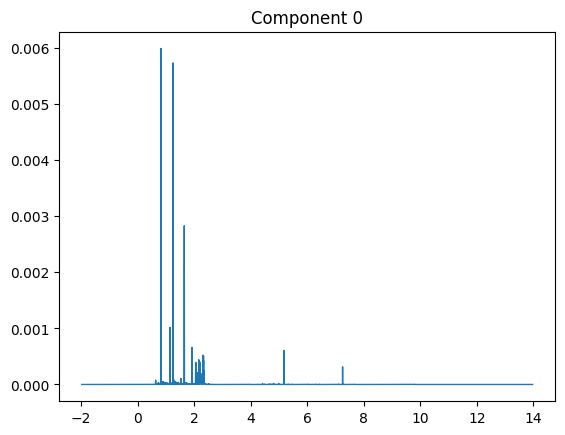

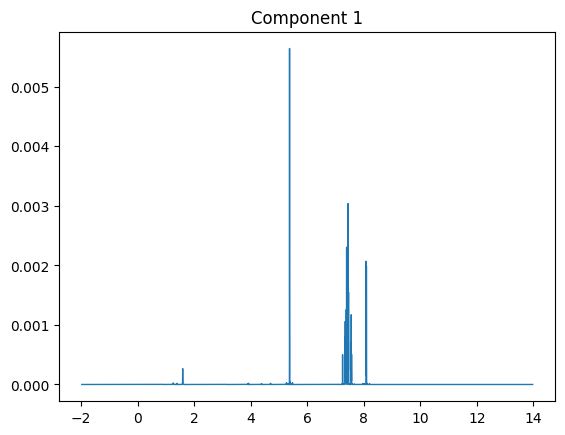

[(np.float64(-1.97165), np.float64(0.0)), (np.float64(-1.97153), np.float64(0.0)), (np.float64(-1.97141), np.float64(5.538064241162506e-08)), (np.float64(-1.97129), np.float64(1.3120820060587904e-07)), (np.float64(-1.97117), np.float64(1.4551522316284662e-07)), (np.float64(-1.97104), np.float64(9.1148044875714e-08)), (np.float64(-1.97092), np.float64(3.678148230190124e-08)), (np.float64(-1.9708), np.float64(5.1088504858868806e-08)), (np.float64(-1.97068), np.float64(6.575325685467604e-08)), (np.float64(-1.97056), np.float64(8.041800885048327e-08))]


In [3]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from wasserstein import Spectrum, NMRSpectrum
from magnetstein_data.simple_wasserstein_descent import estimate_proportions_wasserstein
import matplotlib.pyplot as plt
from typing import List
from matplotlib import pyplot as plt

import numpy as np
from tqdm import trange

components_names = ["Pinene", "Benzyl benzoate"]

protons_list = [16, 12]

filename = "experiment_1_intensity_difference/preprocessed_mix.csv"
mix = np.loadtxt(filename, delimiter=",")
# If you are using file exported from Mnova, comment line above and uncomment line below.
# mix = np.loadtxt(filename, delimiter='\t', usecols=[0,1])

how_many_components = len(components_names)
names = ["comp" + str(i) for i in range(how_many_components)]

files_with_components = [
    "experiment_1_intensity_difference/preprocessed_comp0.csv",
    "experiment_1_intensity_difference/preprocessed_comp1.csv",
]
spectra = []
for i in range(how_many_components):
    filename = files_with_components[i]
    spectra.append(np.loadtxt(filename, delimiter=","))
    # If you are using file exported from Mnova, comment line above and uncomment line below.
    # spectra.append(np.loadtxt(filename, delimiter='\t', usecols=[0,1]))

spectra2: List[NMRSpectrum] = []
names = []
for i in range(len(spectra)):
    spectra2.append(
        NMRSpectrum(
            confs=list(zip(spectra[i][:, 0], spectra[i][:, 1])), protons=protons_list[i]
        )
    )
    names.append("comp" + str(i))

spectra = spectra2
del spectra2
mix = NMRSpectrum(confs=list(zip(mix[:, 0], mix[:, 1])))
mix.trim_negative_intensities()
mix.normalize()
for sp in spectra:
    sp.trim_negative_intensities()
    sp.normalize()
plt.title("Mixture")
mix.plot(profile=True)
for i, sp in enumerate(spectra):
    plt.title("Component " + str(i))
    sp.plot(profile=True)
print(spectra[0].confs[:10])


Final weights:
  comp1 = 0.1133
  comp2 = 0.8867

Final Wasserstein distance to true mixture: 0.035052

Wasserstein distance for given mixture (0.393072, 0.606928): 1.475327


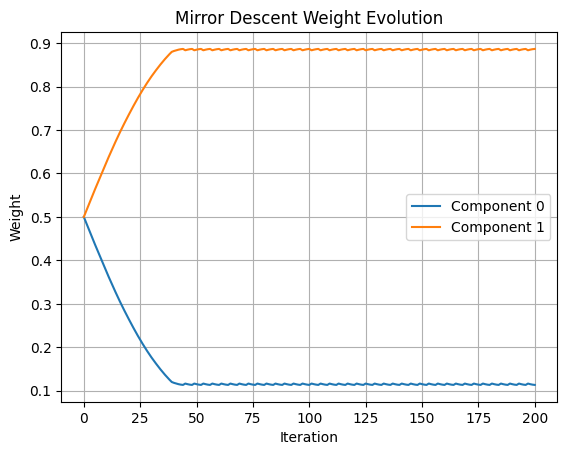

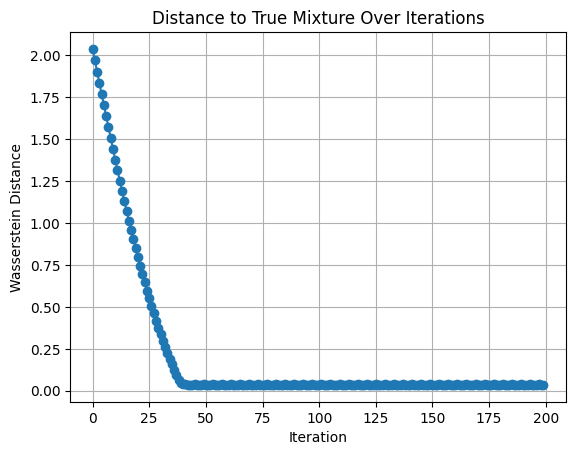

In [4]:
# Run full estimation pipeline
final_p, traj, score_history, ws_dist, ws_dist_given = \
    estimate_proportions_wasserstein(mix, spectra,
                                     learning_rate=0.01, T=200)

# Display results
print("\nFinal weights:")
print(f"  comp1 = {final_p[0]:.4f}")
print(f"  comp2 = {final_p[1]:.4f}")
print(f"\nFinal Wasserstein distance to true mixture: {ws_dist:.6f}")
print(f"\nWasserstein distance for given mixture (0.393072, 0.606928): {ws_dist_given:.6f}")

# Plot weight evolution
traj_np = traj.detach().cpu().numpy()

plt.plot(traj_np[:,0], label="Component 0")
plt.plot(traj_np[:,1], label="Component 1")
plt.xlabel("Iteration")
plt.ylabel("Weight")
plt.title("Mirror Descent Weight Evolution")
plt.legend()
plt.grid(True)
plt.show()

# Plot distance history
plt.plot(score_history, marker="o")
plt.xlabel("Iteration")
plt.ylabel("Wasserstein Distance")
plt.title("Distance to True Mixture Over Iterations")
plt.grid(True)
plt.show()